In [4]:
import pandas as pd
import datetime
import prophet


In [5]:
df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [6]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [7]:
df['Activity Period']

0        200507
1        200507
2        200507
3        200507
4        200507
          ...  
15002    201603
15003    201603
15004    201603
15005    201603
15006    201603
Name: Activity Period, Length: 15007, dtype: int64

In [8]:
df['Date'] = df['Activity Period'].apply(lambda x: datetime.date(year=int(str(x)[:4]), month=int(str(x)[4:6]), day=1))
df['Date']

0        2005-07-01
1        2005-07-01
2        2005-07-01
3        2005-07-01
4        2005-07-01
            ...    
15002    2016-03-01
15003    2016-03-01
15004    2016-03-01
15005    2016-03-01
15006    2016-03-01
Name: Date, Length: 15007, dtype: object

In [9]:
df['Operating Airline'].unique()

array(['ATA Airlines', 'Air Canada ', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air ', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas A

In [10]:
train_dataset= pd.DataFrame()

train_dataset = df[df['Operating Airline'] =='KLM Royal Dutch Airlines']
train_dataset['ds'] = df['Date']
train_dataset['y']= df['Adjusted Passenger Count']

train_dataset.head(115)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,Date,ds,y
55,200507,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,9978,Deplaned,9978,2005,July,2005-07-01,2005-07-01,9978
56,200507,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Enplaned,Other,International,A,9587,Enplaned,9587,2005,July,2005-07-01,2005-07-01,9587
171,200508,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,9666,Deplaned,9666,2005,August,2005-08-01,2005-08-01,9666
172,200508,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Enplaned,Other,International,A,9881,Enplaned,9881,2005,August,2005-08-01,2005-08-01,9881
289,200509,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,9562,Deplaned,9562,2005,September,2005-09-01,2005-09-01,9562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,201002,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,5740,Deplaned,5740,2010,February,2010-02-01,2010-02-01,5740
6466,201002,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Enplaned,Other,International,A,4734,Enplaned,4734,2010,February,2010-02-01,2010-02-01,4734
6575,201003,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Deplaned,Other,International,A,7359,Deplaned,7359,2010,March,2010-03-01,2010-03-01,7359
6576,201003,KLM Royal Dutch Airlines,KL,KLM Royal Dutch Airlines,KL,International,Europe,Enplaned,Other,International,A,6905,Enplaned,6905,2010,March,2010-03-01,2010-03-01,6905


In [11]:
from prophet import Prophet

prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future= prophet_basic.make_future_dataframe(periods=14, freq='M')
future.tail(15)

,ds
128,2016-03-01
129,2016-03-31
130,2016-04-30
131,2016-05-31
132,2016-06-30
133,2016-07-31
134,2016-08-31
135,2016-09-30
136,2016-10-31
137,2016-11-30


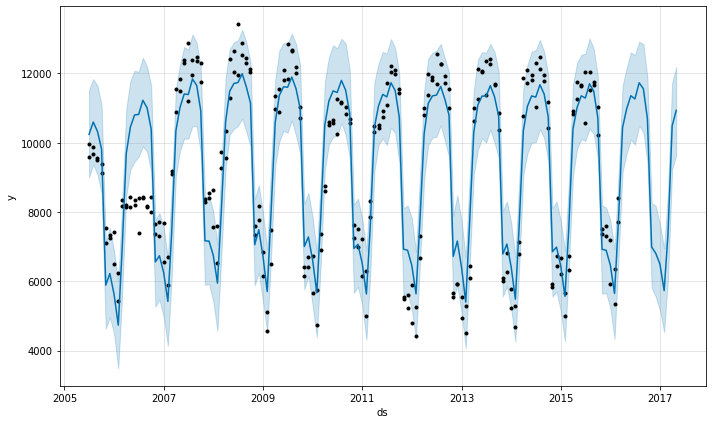

In [13]:
forecast=prophet_basic.predict(future)
fig1 =prophet_basic.plot(forecast)

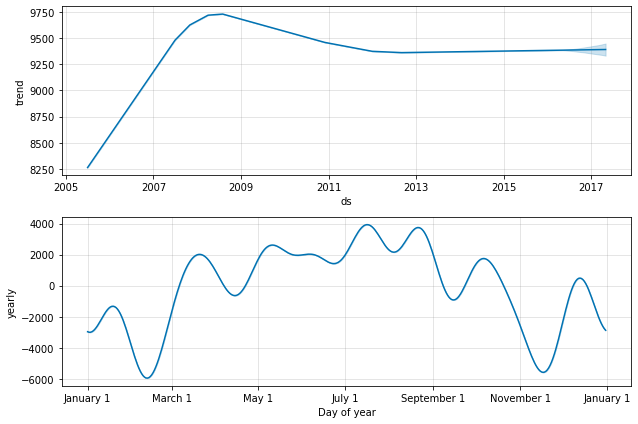

In [14]:
fig1 = prophet_basic.plot_components(forecast)


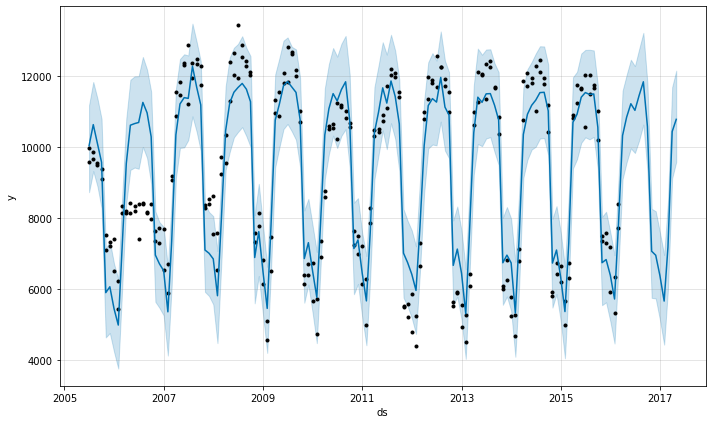

In [23]:
pro_change= Prophet(n_changepoints=4, weekly_seasonality=True, daily_seasonality=True )
model = pro_change.fit(train_dataset, )
forecast = model.predict(future)
fig= pro_change.plot(forecast);
#a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

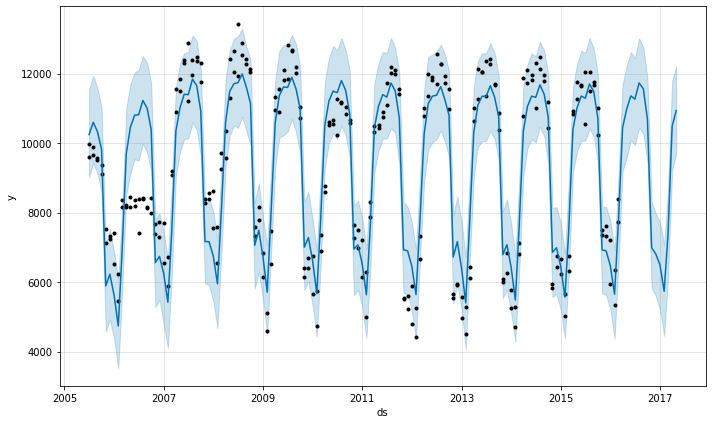

In [21]:
fig= pro_change.plot(prophet_basic.predict(future));


In [24]:
from prophet.diagnostics import cross_validation
df_cv_season = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')


INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


WARNING - Optimization terminated abnormally. Falling back to Newton.
WARNING - Optimization terminated abnormally. Falling back to Newton.
WARNING - Optimization terminated abnormally. Falling back to Newton.


In [17]:
from prophet.diagnostics import performance_metrics


In [25]:
df_p_season = performance_metrics(df_cv_season)
df_p_season.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,6.091837e+06,2468.164675,1666.263958,0.176099,0.103542,0.196996,0.578947
1,39 days,6.112635e+06,2472.374319,1687.808149,0.178201,0.103542,0.199251,0.578947
2,43 days,6.163654e+06,2482.670747,1706.413098,0.185750,0.103542,0.205439,0.552632
3,45 days,6.301818e+06,2510.342183,1763.203183,0.190300,0.121188,0.210515,0.500000
4,49 days,6.317144e+06,2513.392904,1771.234867,0.195606,0.127200,0.214780,0.500000


In [27]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_basic, initial='730 days', period='180 days', horizon = '365 days')


INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


In [28]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,3.409715e+06,1846.541271,1395.906353,0.153199,0.099891,0.139405,0.657895
1,39 days,3.382904e+06,1839.267163,1374.785086,0.151321,0.099891,0.137714,0.657895
2,43 days,3.459781e+06,1860.048608,1400.757092,0.160331,0.099891,0.144984,0.605263
3,45 days,3.582546e+06,1892.761429,1454.812662,0.164672,0.106785,0.149790,0.552632
4,49 days,3.606121e+06,1898.978851,1464.589189,0.171302,0.108520,0.154804,0.552632


In [19]:
from dask.distributed import Client
from dask_gateway import Gateway
from distributed import Client

client = Client()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/distributed/node.py:155: UserWarning:

Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40499 instead



In [26]:
import pandas as pd

import dask.distributed
import prophet
import itertools
import functools
from prophet.diagnostics import cross_validation, performance_metrics


def single_param_cv(history_df, metrics, param_dict):
    m = prophet.Prophet(**param_dict)
    m.fit(history_df)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    df_p['params'] = str(param_dict)
    df_p = df_p.loc[:, metrics]
    return df_p


def param_grid_to_df(**param_dict):
    param_iter = itertools.product(*param_dict.values())
    params =[]
    for param in param_iter:
        params.append(param) 
    params_df = pd.DataFrame(params, columns=list(param_dict.keys()))
    return params_df


def hyperparameter_cv(history_df, params_df, single_cv_callable, pool):
    results = []
    for param in params_df.values:
        param_dict = dict(zip(params_df.keys(), param))
        if pool is None:
            predict = single_cv_callable(history_df, param_dict=param_dict)
            results.append(predict)
        elif isinstance(pool, dask.distributed.client.Client):
            remote_df = pool.scatter(history_df)
            future = pool.submit(single_cv_callable, remote_df, param_dict=param_dict)
            results.append(future)
        else:
            raise ValueError(f'Pool needs to be an instantiated dask distributed client object or None')
    if isinstance(pool, dask.distributed.client.Client):
        results = pool.gather(results)
    results_df = pd.concat(results)
    
    return results_df


param_dict = {  
                'changepoint_prior_scale': [0.1, 1],
                'changepoint_range': [0.1, 1],
                'seasonality_prior_scale':[0.1, 1,],
                'holidays_prior_scale':[0.1, 1, ],
                'seasonality_mode': ['multiplicative', 'additive'],
              }

metrics = ['horizon', 'rmse', 'mape', 'params'] 

params_df = param_grid_to_df(**param_dict)
single_cv_callable = functools.partial(single_param_cv, metrics=metrics)


In [27]:
%time result_df  = hyperparameter_cv(train_dataset, params_df, single_cv_callable, pool=None)

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater than number of observations. Using 15.
INFO - n_changepoints greater than number of observations. Using 16.
INFO - n_changepoints greater than number of observations. Using 17.
INFO - n_changepoints greater than number of observations. Using 18.
INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than numb

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater tha

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater tha

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater tha

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater tha

INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater tha

INFO - n_changepoints greater than number of observations. Using 15.
INFO - n_changepoints greater than number of observations. Using 16.
INFO - n_changepoints greater than number of observations. Using 17.
INFO - n_changepoints greater than number of observations. Using 18.
INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater 

INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater tha

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater tha

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater tha

INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater than number of observations. Using 12.
INFO - n_changepoints greater than number of observations. Using 14.
INFO - n_changepoints greater tha

INFO - n_changepoints greater than number of observations. Using 17.
INFO - n_changepoints greater than number of observations. Using 18.
INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater th

INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater than number of observations. Using 9.
INFO - n_changepoints greater than number of observations. Using 10.
INFO - n_changepoints greater than number of observations. Using 11.
INFO - n_changepoints greater tha

INFO - n_changepoints greater than number of observations. Using 17.
INFO - n_changepoints greater than number of observations. Using 18.
INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater th

INFO - n_changepoints greater than number of observations. Using 17.
INFO - n_changepoints greater than number of observations. Using 18.
INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater than number of observations. Using 8.
INFO - n_changepoints greater th

INFO - n_changepoints greater than number of observations. Using 16.
INFO - n_changepoints greater than number of observations. Using 17.
INFO - n_changepoints greater than number of observations. Using 18.
INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - n_changepoints greater than number of observations. Using 24.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
INFO - n_changepoints greater than number of observations. Using 4.
INFO - n_changepoints greater than number of observations. Using 5.
INFO - n_changepoints greater than number of observations. Using 7.
INFO - n_changepoints greater t

INFO - n_changepoints greater than number of observations. Using 18.
INFO - n_changepoints greater than number of observations. Using 20.
INFO - n_changepoints greater than number of observations. Using 21.
INFO - n_changepoints greater than number of observations. Using 22.
INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00


INFO - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Making 16 forecasts with cutoffs between 2007-10-10 00:00:00 and 2015-03-02 00:00:00
